EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
data = pd.merge(movies, ratings)
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [5]:
print(data['title'].unique())

['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'Flint (2017)' 'Bungo Stray Dogs: Dead Apple (2018)'
 'Andrew Dice Clay: Dice Rules (1991)']


In [6]:
rating = [(data['rating'] <= 2), ((data['rating'] > 2) & (data['rating'] < 4)), 
          (data['rating'] >= 4)]
category = ['low', 'medium', 'high']
data['rating_category'] = np.select(rating, category)
data.head()

,movieId,title,genres,userId,rating,timestamp,rating_category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,high
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,high
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,high
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,medium
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,high


Supervised Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
x = np.array(data['userId']).reshape(-1, 1)
y = np.array(data['rating'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)

model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

mse = mean_squared_error(y_test, y_predict)

print(mse) # 1.0853617335597543
print(y_predict)

1.0853617335597543
[3.53110617 3.46917744 3.55308952 ... 3.45657722 3.42574691 3.42923207]


Supervised Classification

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [10]:
x = data[['userId', 'movieId']]
y = data['rating_category']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)

model = RandomForestClassifier(n_estimators = 100, random_state = 13)
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict)

print(accuracy)
print(classification_report(y_test, y_predict))

0.5180979769932567
              precision    recall  f1-score   support

        high       0.60      0.64      0.62      9798
         low       0.30      0.24      0.27      2695
      medium       0.47      0.45      0.46      7675

    accuracy                           0.52     20168
   macro avg       0.46      0.45      0.45     20168
weighted avg       0.51      0.52      0.51     20168



Unsupervised KMeans Clustering

In [16]:
from sklearn.cluster import KMeans
np.random.seed(13)
data = np.concatenate([np.random.normal(loc = 0, scale = 1, size = (100, 2)), 
                      np.random.normal(loc = 5, scale = 1, size = (100, 2)),
                      np.random.normal(loc = 10, scale = 1, size = (100, 2))])

kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)
labels = kmeans.labels_
center = kmeans.cluster_centers_

print(labels)
print(center)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]
[[ 4.93135741  5.06749064]
 [-0.06524436 -0.02186386]
 [ 9.85137855  9.96948175]]


/Users/srinori/opt/anaconda3/envs/native/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/srinori/opt/anaconda3/envs/native/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/srinori/opt/anaconda3/envs/native/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/srinori/opt/anaconda3/envs/native/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/srinori/opt/anaconda3/envs/native/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

<Axes: >

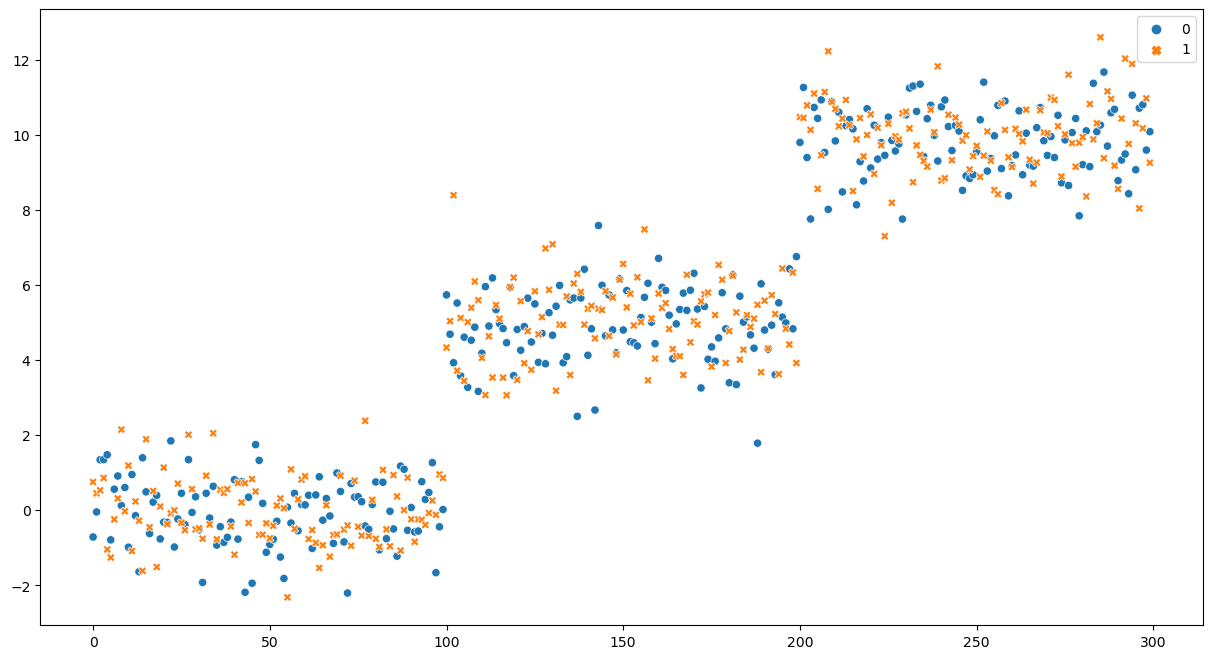

In [17]:
plt.figure(figsize = (15, 8))
sns.scatterplot(data = data)